<a href="https://colab.research.google.com/github/kavikushi0228/Image-processing-assignment-2/blob/main/IP_AS2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

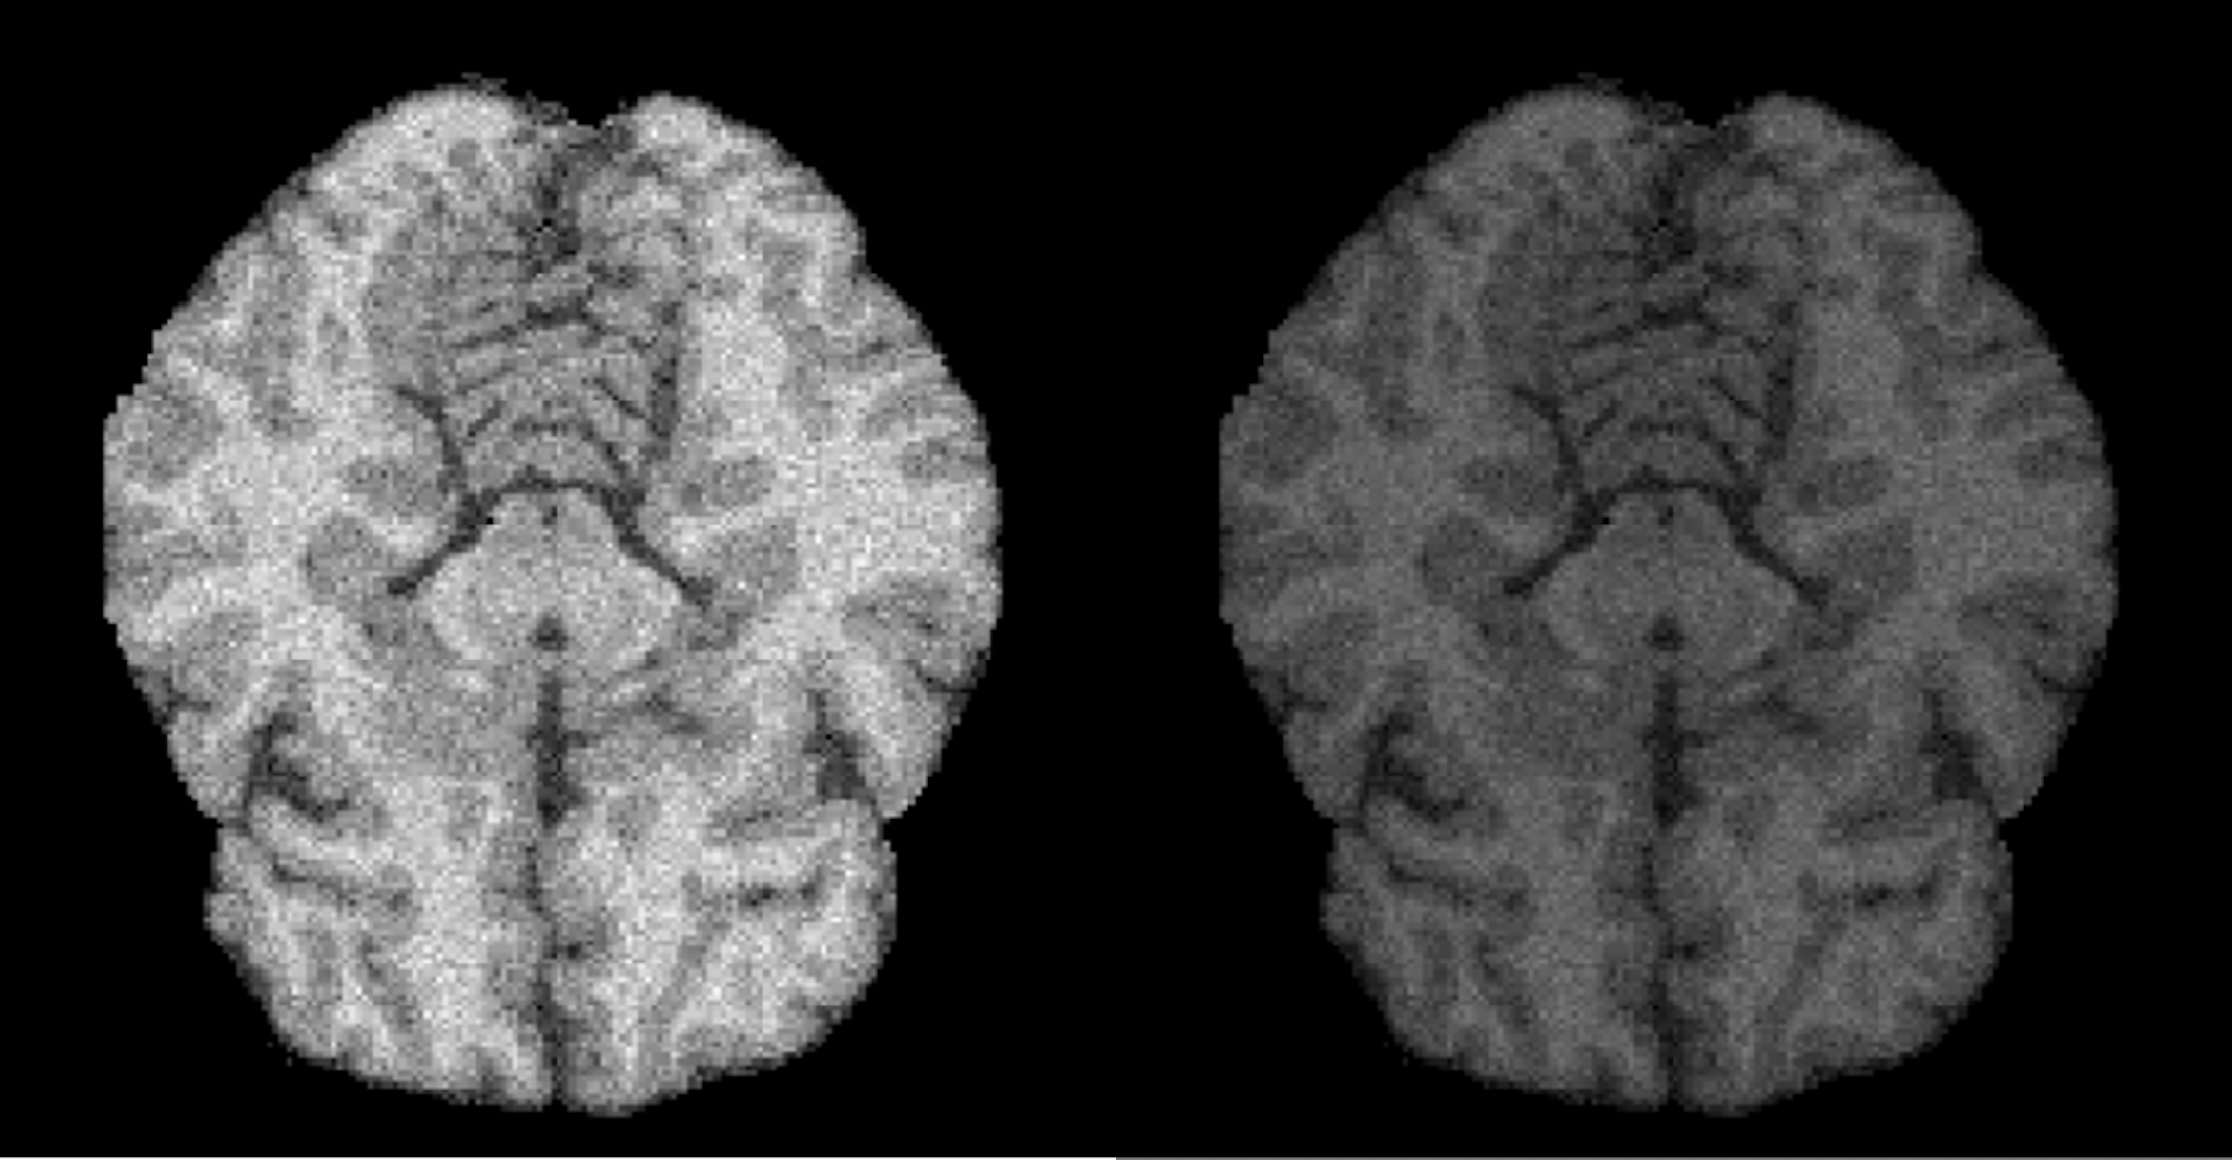

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('m.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a binary mask for the segmented region
mask = np.zeros_like(gray)

# Define the seed point (you can choose any point inside the object of interest)
seed_point = (100, 100)

# Define the threshold range for the region-growing algorithm
threshold_range = (50, 200)

# Define the connectivity for the region-growing algorithm
connectivity = 8

# Define a function for region-growing algorithm
def region_grow(img, mask, seed_point, threshold_range, connectivity):
    # Initialize the queue with the seed point
    queue = [seed_point]

    # Loop over the queue until it is empty
    while len(queue) > 0:
        # Pop the first point from the queue
        current_point = queue.pop(0)

        # Check if the current point is within the threshold range
        if (img[current_point] >= threshold_range[0]) and (img[current_point] <= threshold_range[1]):
            # Set the current point in the mask to 1 (foreground)
            mask[current_point] = 1

            # Get the neighboring points
            neighbors = cv2.getNeighborhoodIndices(img.shape, connectivity, current_point[0], current_point[1])[0]

            # Loop over the neighboring points
            for neighbor in neighbors:
                # Check if the neighbor is within the image bounds and is not already in the mask
                if (neighbor[0] >= 0) and (neighbor[0] < img.shape[0]) and (neighbor[1] >= 0) and (neighbor[1] < img.shape[1]) and (mask[neighbor] == 0):
                    # Add the neighbor to the queue
                    queue.append(neighbor)

    # Return the segmented mask
    return mask

# Call the region-growing function with the input parameters
segmented_mask = region_grow(gray, mask, seed_point, threshold_range, connectivity)

# Convert the segmented mask to a color image for visualization
segmented = cv2.cvtColor(segmented_mask * 255, cv2.COLOR_GRAY2BGR)

# Overlay the segmented image on the original image with a red color
segmented[segmented_mask > 0] = (0, 0, 255)
result = cv2.addWeighted(img, 0.5, segmented, 0.5, 0)

# concatenate the original and segmented images horizontally
display_img = np.concatenate((img, result), axis=1)

# display the concatenated image
cv2_imshow(display_img)

cv2.destroyAllWindows()
